<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/VGG16_Adaptations_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16 Adaptation

Adapts the VGG16 architecture for a smaller image size - 244 x 244

In [16]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

# load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model 1

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()

# Layer 1: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Layer 2: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 3: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 5: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 6: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 8: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 9: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 10: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 11: Flatten layer to convert the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Layer 12: Fully connected layer with 512 units and 'relu' activation
model.add(Dense(512, activation='relu'))

# Layer 13: Fully connected layer with 512 units and 'relu' activation
model.add(Dense(512, activation='relu'))

# Layer 14: Output layer with 'softmax' activation for multi-class classification
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

## Model 2

In [22]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model2 = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Layer 2: Max pooling layer with pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 4: Max pooling layer with pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Flatten layer to convert the 3D feature maps to 1D feature vectors
model2.add(Flatten())

# Layer 6: Fully connected layer with 128 units and 'relu' activation
model2.add(Dense(128, activation='relu'))

# Layer 7: Output layer with 'softmax' activation for multi-class classification
model2.add(Dense(10, activation='softmax'))

In [23]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_13 (Dense)            (None, 128)              

## Model 3

In [24]:
model3 = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 2: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 3: Max pooling layer with pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 5: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 6: Max pooling layer with pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 8: Flatten layer to convert the 3D feature maps to 1D feature vectors
model3.add(Flatten())

# Layer 9: Fully connected layer with 512 units and 'relu' activation
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 10: Fully connected layer with 512 units and 'relu' activation
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 11: Output layer with 'softmax' activation for multi-class classification
model3.add(Dense(10, activation='softmax'))

In [25]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)       

## Model 4 (Imported)

In [41]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [42]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [43]:
# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [44]:
from keras.models import Model
model4 = Model(inputs=base_model.input, outputs=predictions)

In [45]:
model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

## Training

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Epochs = 10

In [35]:
history = model.fit(x_train, y_train, batch_size=64, epochs=Epochs, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 27s 22ms/step - loss: 1.4024 - accuracy: 0.5011 - val_loss: 1.1983 - val_accuracy: 0.5869
Epoch 2/10
782/782 [==============================] - 16s 20ms/step - loss: 0.8736 - accuracy: 0.6900 - val_loss: 1.1498 - val_accuracy: 0.5996
Epoch 3/10
782/782 [==============================] - 15s 20ms/step - loss: 0.6702 - accuracy: 0.7653 - val_loss: 0.9646 - val_accuracy: 0.6785
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.5421 - accuracy: 0.8121 - val_loss: 0.8308 - val_accuracy: 0.7224
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.4443 - accuracy: 0.8463 - val_loss: 0.7398 - val_accuracy: 0.7637
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3587 - accuracy: 0.8749 - val_loss: 0.7637 - val_accuracy: 0.7737
Epoch 7/10
782/782 [==============================] - 15s 20ms/step - loss: 0.2827 - accuracy: 0.9027 - val_loss: 0.8654 - val_accuracy:

In [36]:
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 1.3934 - accuracy: 0.5031 - val_loss: 1.1094 - val_accuracy: 0.6098
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0373 - accuracy: 0.6397 - val_loss: 1.0050 - val_accuracy: 0.6460
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9006 - accuracy: 0.6856 - val_loss: 0.9149 - val_accuracy: 0.6834
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8070 - accuracy: 0.7200 - val_loss: 0.8704 - val_accuracy: 0.7051
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7359 - accuracy: 0.7423 - val_loss: 0.9278 - val_accuracy: 0.6789
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6651 - accuracy: 0.7696 - val_loss: 0.8829 - val_accuracy: 0.7006
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5990 - accuracy: 0.7915 - val_loss: 0.8683 - val_accuracy: 0.7115
Epoch 

In [37]:
history3 = model3.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 12s 13ms/step - loss: 1.4781 - accuracy: 0.4913 - val_loss: 1.3330 - val_accuracy: 0.5483
Epoch 2/10
782/782 [==============================] - 10s 12ms/step - loss: 0.9214 - accuracy: 0.6773 - val_loss: 1.0291 - val_accuracy: 0.6552
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.7338 - accuracy: 0.7436 - val_loss: 0.9136 - val_accuracy: 0.7071
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.6221 - accuracy: 0.7805 - val_loss: 0.8378 - val_accuracy: 0.7301
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 0.5315 - accuracy: 0.8116 - val_loss: 0.7661 - val_accuracy: 0.7469
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.4546 - accuracy: 0.8394 - val_loss: 0.7419 - val_accuracy: 0.7677
Epoch 7/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3825 - accuracy: 0.8657 - val_loss: 0.6869 - val_accuracy: 

In [38]:
history4 = model4.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 14s 17ms/step - loss: 1.3191 - accuracy: 0.5372 - val_loss: 1.2354 - val_accuracy: 0.5612
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 1.1370 - accuracy: 0.5993 - val_loss: 1.1586 - val_accuracy: 0.5902
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 1.0569 - accuracy: 0.6253 - val_loss: 1.1284 - val_accuracy: 0.5989
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9898 - accuracy: 0.6500 - val_loss: 1.1015 - val_accuracy: 0.6150
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9298 - accuracy: 0.6712 - val_loss: 1.1206 - val_accuracy: 0.6104
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.8720 - accuracy: 0.6928 - val_loss: 1.1005 - val_accuracy: 0.6243
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.8140 - accuracy: 0.7122 - val_loss: 1.1209 - val_accuracy:

# Analytics

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [39]:
test_loss4, test_acc4 = model4.evaluate(x_test, y_test, verbose=0)
test_loss3, test_acc3 = model3.evaluate(x_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Testing Loss Model 1:", test_loss)
print("Testing Accuracy Model 1:", test_acc)
print("Testing Loss Model 2:", test_loss2)
print("Testing Accuracy Model 2:", test_acc2)
print("Testing Loss Model 3:", test_loss3)
print("Testing Accuracy Model 3:", test_acc3)
print("Testing Loss Model 4:", test_loss4)
print("Testing Accuracy Model 4:", test_acc4)

Testing Loss Model 1: 0.8798428773880005
Testing Accuracy Model 1: 0.7904000282287598
Testing Loss Model 2: 0.959234356880188
Testing Accuracy Model 2: 0.7024000287055969
Testing Loss Model 3: 0.7911202311515808
Testing Accuracy Model 3: 0.7878000140190125
Testing Loss Model 4: 1.1548272371292114
Testing Accuracy Model 4: 0.6301000118255615


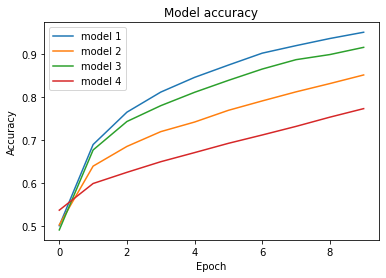

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="model 1")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

model2, = plt.plot(history2.history['accuracy'], label="model 2")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

plt.plot(history3.history['accuracy'], label="model 3")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

plt.plot(history4.history['accuracy'], label="model 4")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
leg = plt.legend(loc='upper left')
plt.show()